In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:


df=pd.read_csv('driver-data.csv')
df.head()



,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:


# Using the KMeans from sklearn
from sklearn.cluster import KMeans



In [13]:
kmeans = KMeans(n_clusters=2)
df_analyze = df.drop('id',axis=1)

In [14]:


kmeans.fit(df_analyze)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:


kmeans.cluster_centers_



array([[ 50.04763437,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [16]:


print(kmeans.labels_)
print(len(kmeans.labels_))



[0 0 0 ... 1 1 1]
4000


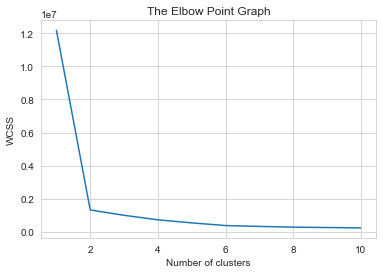

In [21]:
wcss = []
for i in range(1, 11):
    kmeans1 = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans1.fit(df_analyze)
   #appending the WCSS to the list (kmeans.inertia_ returns the WCSS value for an initialized cluster)
    wcss.append(kmeans1.inertia_)  

    
#Plotting The Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



Elbow-Method using WCSS – This is one of the most common and technically robust methods. This is based on principle WCSS decreases with increase in k, rate of increase is usually decreasing. So performance improvement for increasing number of cluster from, say, 3 to 4 is higher than that for increasing from 4 to 5. Plotting WCSS against increasing k can show an ‘elbow’ which demarks significant drop in rate of increase. Selecting number of clusters corresponding to elbow point achieves reasonable performance without having too many clusters. This is still judgmental since what constitutes elbow is visually determined. Further, in practice, there may not be an elbow but smooth curve, or, there may be more than one elbow.

Remember that decrease in WCSS means increasing in clustering performance. In this case, this method is able to help us arrive at true number of clusters.


In [10]:


print (type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))



<class 'numpy.ndarray'>
{0: 311, 1: 1325, 2: 45, 3: 194, 4: 262, 5: 56, 6: 697, 7: 761, 8: 223, 9: 126}


/Users/manimahesh/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


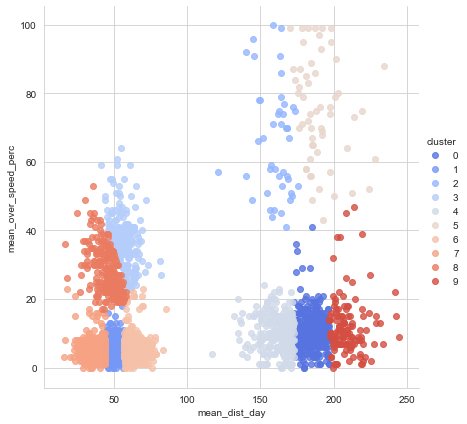

In [22]:


# plot the data 
df_analyze['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=df_analyze, hue='cluster',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)





In [23]:
kmeans_4 = KMeans(n_clusters=4)
kmeans_4.fit(df.drop('id',axis=1))
kmeans_4.fit(df.drop('id',axis=1))
print(kmeans_4.cluster_centers_)	
unique, counts = np.unique(kmeans_4.labels_, return_counts=True)

kmeans_4.cluster_centers_
print(dict(zip(unique, counts)))

[[ 49.98428468   5.21441441]
 [180.34311782  10.52011494]
 [ 50.46127059  32.42823529]
 [177.83509615  70.28846154]]
{0: 2775, 1: 696, 2: 425, 3: 104}


/Users/manimahesh/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


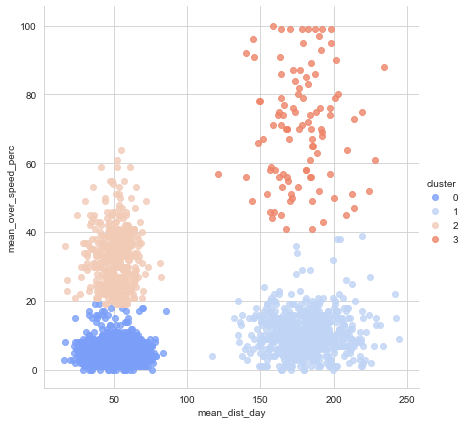

In [24]:


# plot the data 
df_analyze['cluster'] = kmeans_4.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=df_analyze, hue='cluster',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

